In [25]:
%run initialising.ipynb
from matplotlib.ticker import MultipleLocator

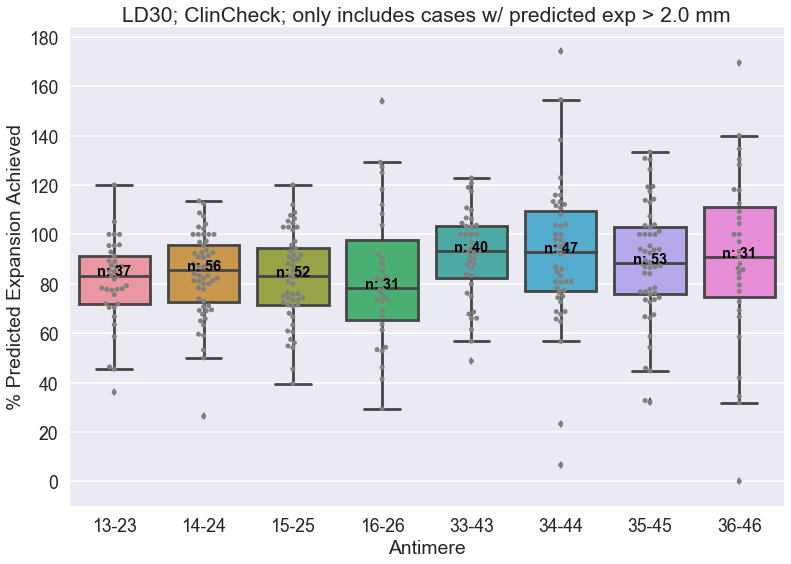

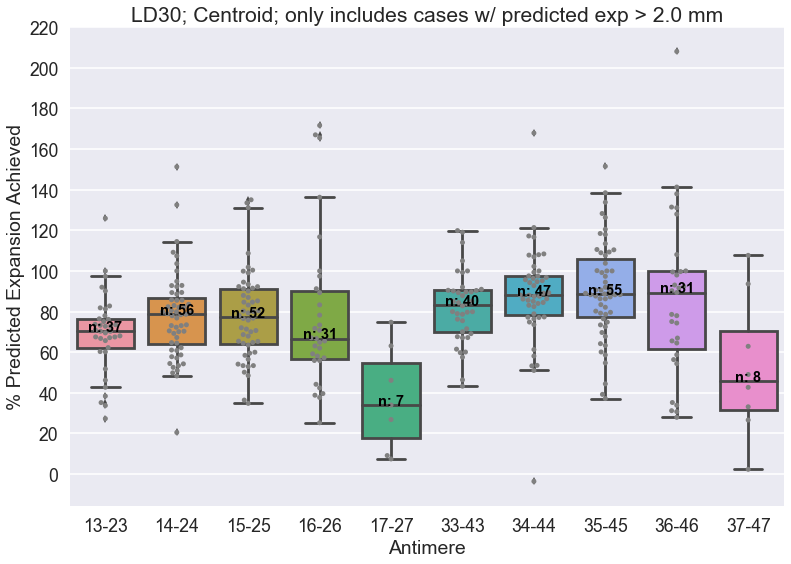

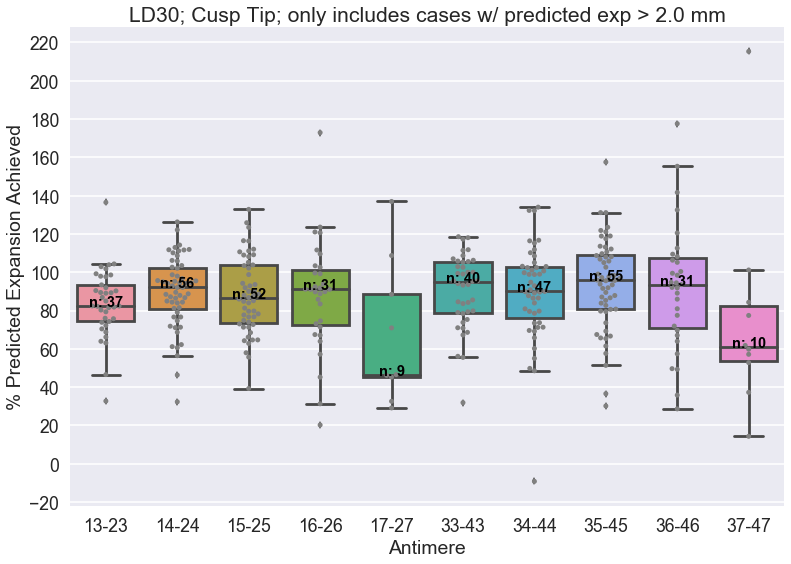

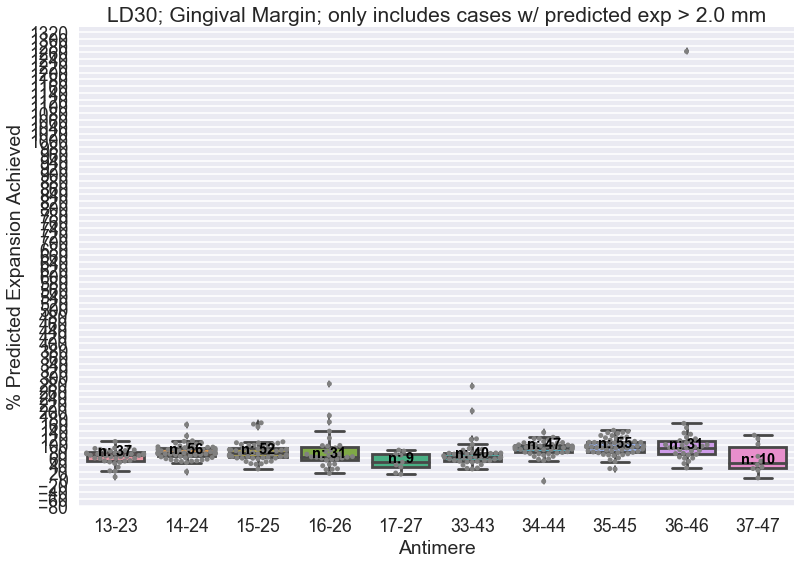

In [26]:
def boxPlot(df, measure_type, threshold, material):
    '''Boxplot: %Accuracy vs Antimere for a given measure_type & material.
    Only includes data where predicted exp > threshold.
    Also outputs .PDF of data.
    '''
    
    pp = PdfPages(os.path.join(OUTPUT_DIR, 'boxplots/boxplots-%s%s.pdf' % (material, measure_type)))
    
    sns.set('poster', font_scale=1.1)
#     sns.set_style('whitegrid', {'grid.linestyle':'--'})
#     sns.set_style('ticks', {'xtick.color':'0',
#                            'ytick.color':'0'})
    f = plt.figure()
    
    newDf = pd.DataFrame(columns = ['%acc', 'antimere', 'material'])
    
    subDf = getSubDf(df, measure_type, THRESHOLD, material)
    for i, j in zip([1, 3], [2, 4]):
        for toothNum in range(3, 8):

            if measure_type == '.cc' and toothNum == 7:
                continue

            antimere = '%s%s-%s%s' % (i, toothNum, j, toothNum)
            full_antimere = '%s%s-%s%s%s %%acc' % (i, toothNum, j, toothNum, measure_type)

            #antimere df
            amDf = pd.DataFrame(subDf[full_antimere].dropna())
            amDf = amDf.rename(columns = lambda x: str(x)[-4:])
            amDf['antimere'] = antimere
            amDf['material'] = material

            newDf = pd.concat([newDf, amDf], ignore_index=True)

    ax = sns.boxplot(x='antimere', y='%acc', data=newDf)
    ax = sns.swarmplot(x='antimere', y='%acc', data=newDf, color="grey")
    
    ### Adding n to boxplot.
    # Calculate number of obs & median to position labels
    medians = newDf.groupby(['antimere'])['%acc'].median().values
    nobs = newDf.groupby(['antimere'])['%acc'].count().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='x-small', color='k', weight='semibold')
        
    ## formatting
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    
    # Set titles
    ax.axes.set_title("%s; %s; only includes cases w/ predicted exp > %s mm" % (material, measure_type_dict[measure_type], threshold))
    ax.set_xlabel("Antimere")
    ax.set_ylabel("% Predicted Expansion Achieved")
    
    sns.plt.show()
    pp.savefig(f, bbox_inches="tight")
    pp.close()
    return

for measure_type in MEASURE_TYPES:
    boxPlot(df, measure_type, THRESHOLD, 'LD30')

In [58]:
inspectPtAntimere(df, 3721347, '16-26')

ptId: 3721347
16-26.cc: 153.846153846
16-26.ctd: 166.998060582
16-26.ct: 172.932330827
16-26.gm: 186.486486486


In [59]:
getColumn(df, '16-26.gm %acc', THRESHOLD, 'LD30')

Patient ID
2886094     26.666667
2895195     56.532663
2987641     65.055762
3006227     42.153846
3120651    167.317073
3170026     83.913043
3220134     95.953757
3280031     70.644391
3328760     63.592233
3452431     73.059361
3481023     57.731959
3519570     72.018349
3538481     64.310954
3558898     27.607362
3616430    140.277778
3721347    186.486486
3791559    119.911504
3855283     43.005181
3916320     15.241636
3970955    280.232558
3976052     63.333333
4151217     68.899522
4233296     80.423280
4393227     90.810811
4401903     54.508197
4519394     98.104265
4533730     38.107417
4629395     60.471976
4678988     97.752809
5384124     60.800000
5884033     29.032258
Name: 16-26.gm %acc, dtype: float64

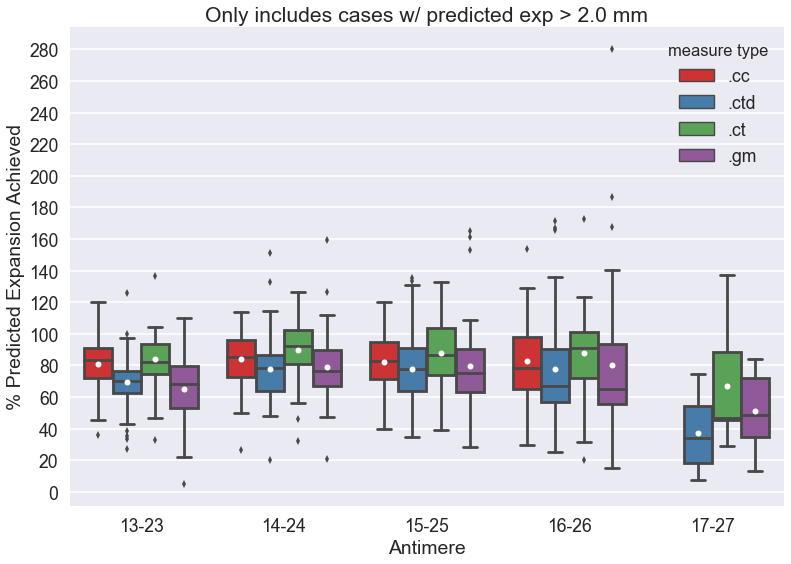

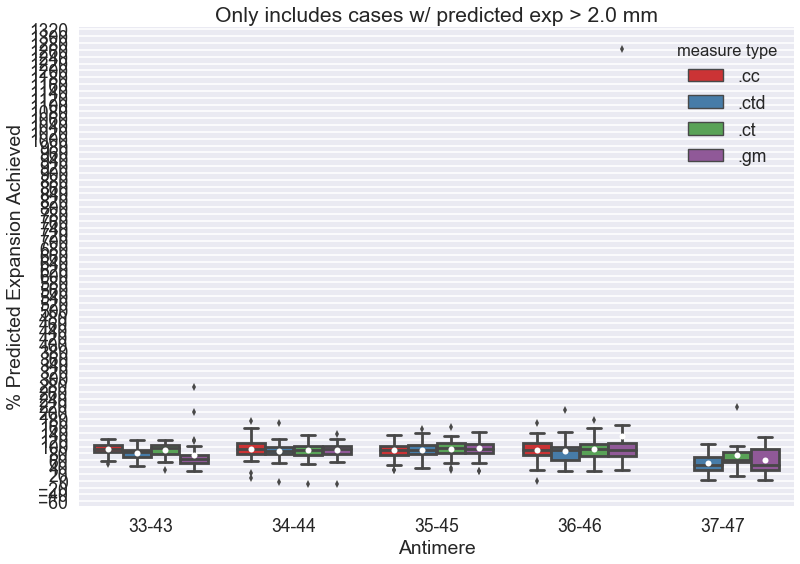

In [27]:
def multi_measures_grouped_boxplot(df, threshold, material):
    '''Grouped Boxplot: %Accuracy vs Antimere grouped by material (LD30 vs EX30), for a given measure_type;
    Only includes data where predicted exp > threshold.
    Also outputs .PDF of data.'''
    
    
    sns.set('poster', font_scale=1.1)  
    
    newDf = pd.DataFrame(columns = ['%acc', 'antimere', 'measure type'])
    
    for measure_type in MEASURE_TYPES:
        subDf = getSubDf(df, measure_type, threshold, material)
        for i, j in zip([1, 3], [2, 4]):
            for toothNum in range(3, 8):

                if measure_type == '.cc' and toothNum == 7:
                    continue

                antimere = '%s%s-%s%s' % (i, toothNum, j, toothNum)
                full_antimere = '%s%s-%s%s%s %%acc' % (i, toothNum, j, toothNum, measure_type)

                #antimere df
                amDf = pd.DataFrame(subDf[full_antimere].dropna()) # gives 1-column df 'xx-xx.xx %acc'
                amDf = amDf.rename(columns = lambda x: str(x)[-4:]) # 1 column is renamed to '%acc'
                amDf['antimere'] = antimere # adds column 'antimere'
                amDf['measure type'] = measure_type # adds column 'measure type'
                
                newDf = pd.concat([newDf, amDf], ignore_index=True)
    
    mxArch = ['13-23','14-24','15-25','16-26','17-27']
    mdArch = ['33-43','34-44','35-45','36-46','37-47']
    
    for arch in [mxArch, mdArch]:
        if arch == mxArch:
            pp = PdfPages(os.path.join(OUTPUT_DIR, 'boxplots/multi-measures-grouped-boxplots-%s-%s.pdf' % (material, 'Mx')))
        else:
            pp = PdfPages(os.path.join(OUTPUT_DIR, 'boxplots/multi-measures-grouped-boxplots-%s-%s.pdf' % (material, 'Md')))

        f = plt.figure()      
        ax = sns.boxplot(x='antimere', y='%acc', hue='measure type', data=newDf, showmeans=True, palette="Set1",
                         order=arch,
                         meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

        ## formatting
        ax.yaxis.set_major_locator(MultipleLocator(20))
        ax.yaxis.set_minor_locator(MultipleLocator(10))
        # ax.set_ylim((-20, 200))

        # Set titles
        ax.axes.set_title("Only includes cases w/ predicted exp > %s mm" % (threshold))
        ax.set_xlabel("Antimere")
        ax.set_ylabel("% Predicted Expansion Achieved")
        sns.plt.show()

        pp.savefig(f, bbox_inches="tight")
        pp.close()

    return

multi_measures_grouped_boxplot(df, THRESHOLD, 'LD30')

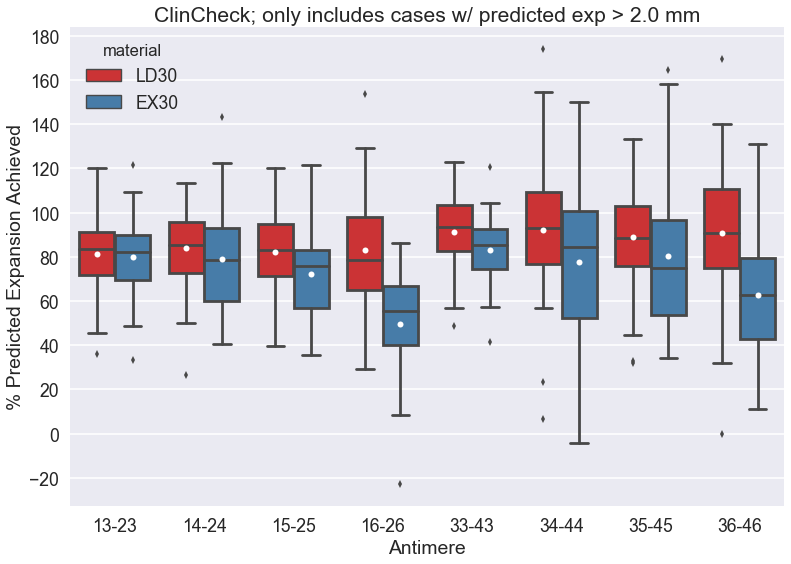

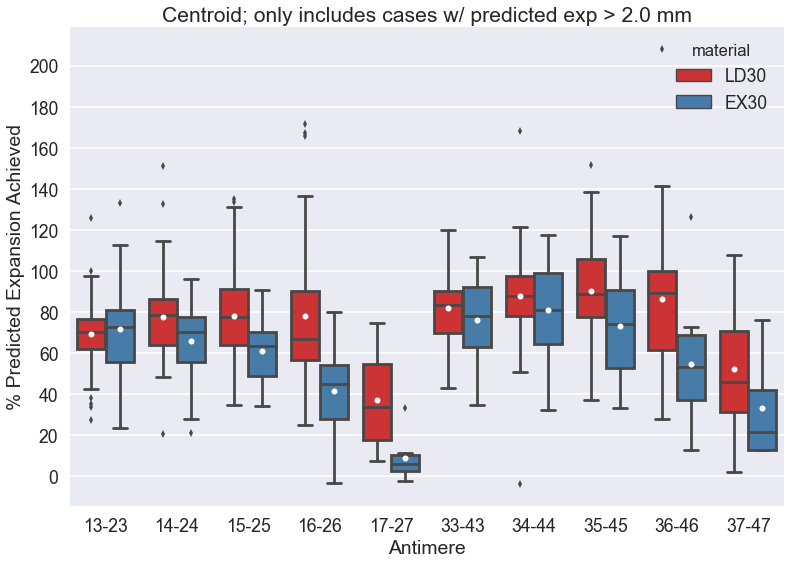

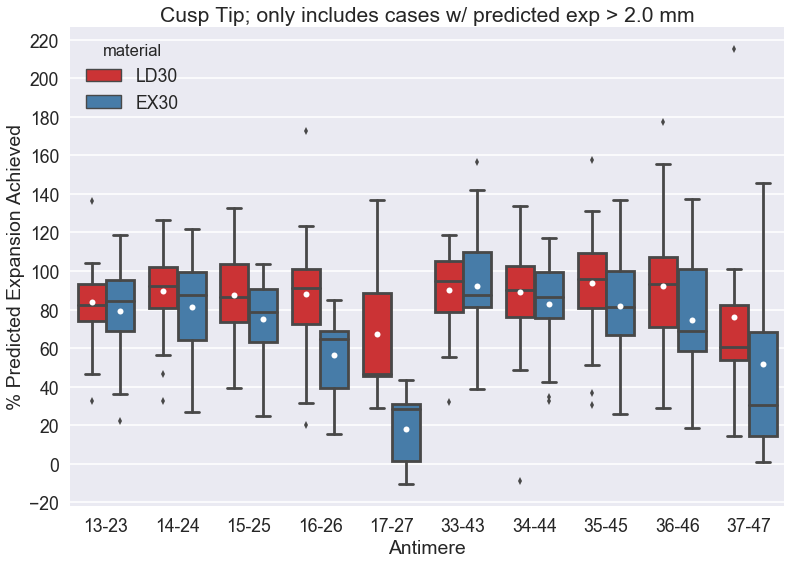

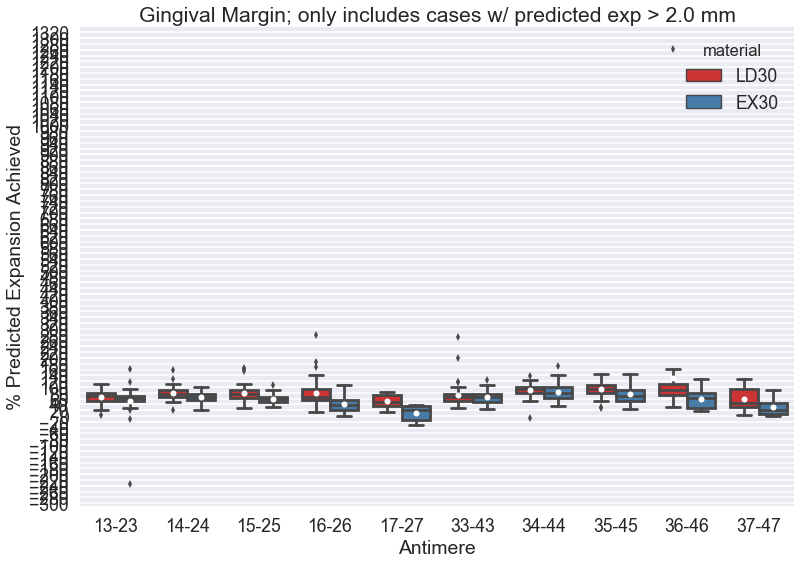

In [28]:
def LD30_vs_EX30_grouped_boxplot(df, measure_type, threshold):
    '''Grouped Boxplot: %Accuracy vs Antimere grouped by material (LD30 vs EX30), for a given measure_type;
    Only includes data where predicted exp > threshold.
    Also outputs .PDF of data.'''
    
    pp = PdfPages(os.path.join(OUTPUT_DIR, 'boxplots/LD30-vs-EX30-grouped-boxplots-%s.pdf' % (measure_type)))

    sns.set('poster', font_scale=1.1)

    f = plt.figure()    
    
    newDf = pd.DataFrame(columns = ['%acc', 'antimere', 'material'])
    
    for material in ['LD30', 'EX30']:
        subDf = getSubDf(df, measure_type, threshold, material)
        for i, j in zip([1, 3], [2, 4]):
            for toothNum in range(3, 8):
                
                if measure_type == '.cc' and toothNum == 7:
                    continue
                
                antimere = '%s%s-%s%s' % (i, toothNum, j, toothNum)
                full_antimere = '%s%s-%s%s%s %%acc' % (i, toothNum, j, toothNum, measure_type)

                #antimere df
                amDf = pd.DataFrame(subDf[full_antimere].dropna())
                amDf = amDf.rename(columns = lambda x: str(x)[-4:])
                amDf['antimere'] = antimere
                amDf['material'] = material
                
                newDf = pd.concat([newDf, amDf], ignore_index=True)
    
    ax = sns.boxplot(x='antimere', y='%acc', hue='material', data=newDf, showmeans=True, palette="Set1", 
                     meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

    ## formatting
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    # ax.set_ylim((-20, 200))
    
    # Set titles
    ax.axes.set_title("%s; only includes cases w/ predicted exp > %s mm" % (measure_type_dict[measure_type], threshold))
    ax.set_xlabel("Antimere")
    ax.set_ylabel("% Predicted Expansion Achieved")
    sns.plt.show()
    
    pp.savefig(f, bbox_inches="tight")
    pp.close()
    
    return
for measure_type in MEASURE_TYPES:
    LD30_vs_EX30_grouped_boxplot(df, measure_type, THRESHOLD)